In [1]:
import cufflinks as cf
import numpy as np
import pandas as pd
import plotly.express as px

%matplotlib inline

from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
cf.go_offline()

C:\Users\USER\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
arr_1 = np.random.randn(100, 4)
df_1 = pd.DataFrame(arr_1, columns=['A', 'B', 'C', 'D'])
df_1.head()

,A,B,C,D
0,1.432606,1.227728,0.166634,-0.302789
1,0.529681,-0.322069,1.115536,-0.124239
2,-0.357332,-0.781476,-0.505017,0.729724
3,-1.594608,0.515281,-0.593983,-1.592814
4,1.528294,0.124877,-0.221084,-0.921387


<Axes: >

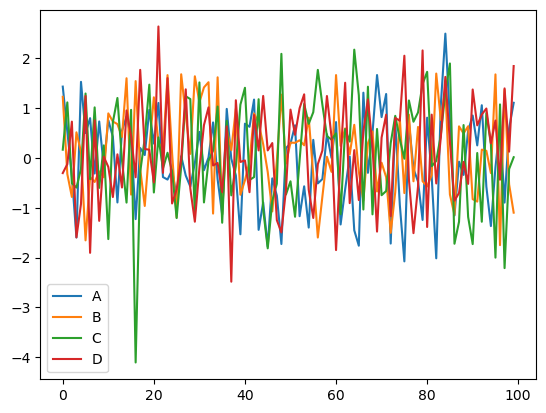

In [3]:
df_1.plot()

In [4]:
df_1.iplot()

# Line Plots

In [5]:
import plotly.graph_objects as go

df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', labels={'x': 'Date', 'y': 'Price'})

In [6]:
px.line(df_stocks, x='date', y=['GOOG', 'AAPL'], labels={'x': 'Date', 'y': 'Price'}, title='Apple vs. Google')

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode='lines+markers', name='Google',
                         line=dict(color='firebrick', width=2, dash='dot')))

fig.update_layout(
    title='Stock Prices of Tech Giants (2018-2020)',
    xaxis_title='Date',
    yaxis_title='Stock Price',
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)'
        )
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110
    ),
    showlegend=True,  # set to True to display legend
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    plot_bgcolor='black'
)

fig.show()


# Bar Charts

In [11]:
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')

In [12]:
df_co = px.data.gapminder().query("country == 'Colombia'")
px.bar(df_co, x='year', y='pop')

In [13]:
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex',
       title='Tips by Sex on Each Day',
       labels={'tip': 'Tip Ammount', 'day': 'Day of the Week'})

In [14]:
px.bar(df_tips, x='sex', y='total_bill', color='smoker', barmode='group')

In [16]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
df_europe.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
119,Belgium,Europe,2007,79.441,10392226,33692.605080,BEL,56
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803,BIH,70
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820,BGR,100


In [20]:
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig

# Scatter Plots

In [23]:
df_iris = px.data.iris()
px.scatter(df_iris, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['petal_width'])